In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk(r'C:\Users\asus\Desktop\USW Project\Classify_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T1.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T10.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T100.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T101.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T102.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T103.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T104.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T105.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T106.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T107.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T108.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T109.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T11.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T110.jpg
C:\Users\asus\Desktop\USW Project\Classify_Data\Testing\T111.jpg
C:\Users\asus\Desktop\USW Pro

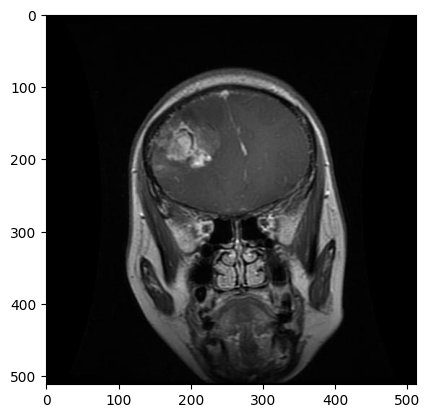

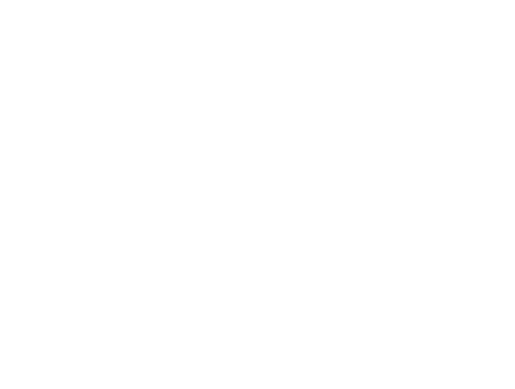

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

DATADIR = r"C:\Users\asus\Desktop\USW Project\Classify_Data\Training"
CATEGORIES = ['glioma','meningioma','notumor','pituitary']
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 129.5, 129.5, -0.5)

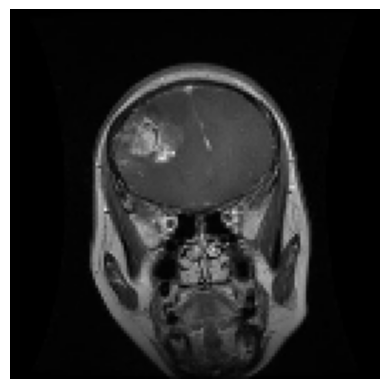

In [3]:
IMG_SIZE = 130
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,130,130,1)

(5712, 130, 130)


In [6]:
from keras.utils import to_categorical # convert to one-hot-encoding
y = to_categorical(y, num_classes = 4)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (4569, 130, 130, 1)
x_test shape (1143, 130, 130, 1)
y_train shape (4569, 4)
y_test shape (1143, 4)


In [8]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

CNN_model = Sequential()
#
CNN_model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (130,130,1)))
CNN_model.add(MaxPool2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.25))
#
CNN_model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNN_model.add(Dropout(0.3))
#
CNN_model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNN_model.add(Dropout(0.3))

#
CNN_model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNN_model.add(Dropout(0.3))

# 
CNN_model.add(Flatten())
CNN_model.add(Dense(1024, activation = "relu"))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(4, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
CNN_model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs =100
batch_size = 16
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False) 
history = CNN_model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_val, Y_val))

# Extract features from the CNN
cnn_features_train = CNN_model.predict(X_train)
cnn_features_test = CNN_model.predict(X_val)

# Train an SVM classifier on CNN features
SVM_model = SVC(kernel='linear', C=1.0)
# Assuming y_train is one-hot encoded
SVM_model.fit(cnn_features_train, np.argmax(Y_train, axis=1))

# Predict using the SVM model
SVM_predictions = SVM_model.predict(cnn_features_test)

# Calculate accuracy
SVM_accuracy = accuracy_score(np.argmax(Y_val, axis=1), SVM_predictions) * 100
print('Hybrid SVM-CNN Accuracy: %.2f%%' % SVM_accuracy)

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


286/286 ━━━━━━━━━━━━━━━━━━━━ 189s 632ms/step - accuracy: 0.4531 - loss: 1.1534 - val_accuracy: 0.6842 - val_loss: 0.7027
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 182s 636ms/step - accuracy: 0.7369 - loss: 0.6716 - val_accuracy: 0.8031 - val_loss: 0.4998
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 200s 699ms/step - accuracy: 0.7870 - loss: 0.5456 - val_accuracy: 0.7568 - val_loss: 0.4939
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 192s 670ms/step - accuracy: 0.8214 - loss: 0.4527 - val_accuracy: 0.8093 - val_loss: 0.4279
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 188s 656ms/step - accuracy: 0.8611 - loss: 0.3721 - val_accuracy: 0.8871 - val_loss: 0.3082
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 194s 677ms/step - accuracy: 0.8771 - loss: 0.3352 - val_accuracy: 0.8241 - val_loss: 0.4454
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 184s 643ms/step - accuracy: 0.8776 - loss: 0.3096 - val_accuracy: 0.8950 - val_loss: 0.2699
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 176s 616ms/step - accuracy: 0.8865 - los

In [9]:
CNN_model.save('Classification_Model.h5')

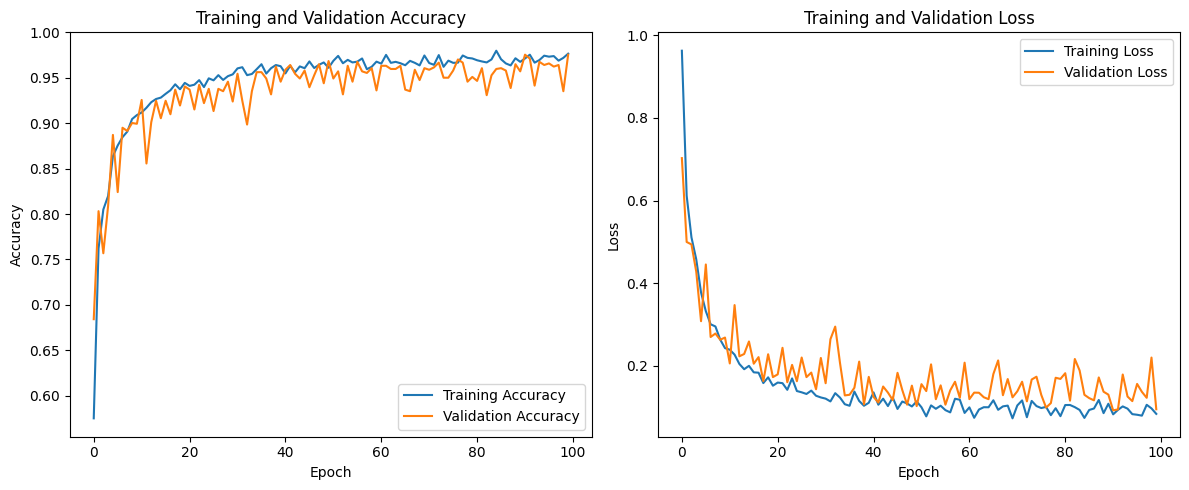

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

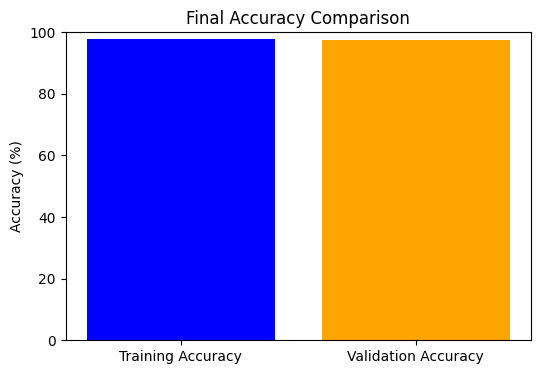

In [12]:
labels = ['Training Accuracy', 'Validation Accuracy']
accuracy_scores = [history.history['accuracy'][-1]
                   * 100, history.history['val_accuracy'][-1] * 100]

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracy_scores, color=['blue', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Final Accuracy Comparison')
plt.ylim(0, 100)
plt.show()